In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [6]:
fs=tf.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fs.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train= X_train.reshape(60000,784) 
X_test = X_test.reshape(10000,784) 

In [9]:
X_train=X_train /255
X_test =X_test /255

In [10]:
encoding_dim=32
input_img=Input(shape=(784,))
encoded=Dense(encoding_dim,activation='relu')(input_img)
decoded=Dense(784,activation='softmax')(encoded)
autoencoder=Model(input_img,decoded)

In [11]:
#encoder

In [12]:
encoder=Model(input_img,encoded)

In [13]:
#decoder

In [14]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [17]:
trained_model1=autoencoder.fit(X_train,X_train,batch_size=256,epochs=10,validation_data=(X_test,X_test))

Epoch 1/10
235/235 [==============================] - 8s 35ms/step - loss: 1.7717 - accuracy: 0.0065 - val_loss: 1.7459 - val_accuracy: 0.0091
Epoch 2/10
235/235 [==============================] - 7s 29ms/step - loss: 1.7350 - accuracy: 0.0101 - val_loss: 1.7375 - val_accuracy: 0.0119
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 1.7296 - accuracy: 0.0131 - val_loss: 1.7339 - val_accuracy: 0.0171
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: 1.7265 - accuracy: 0.0145 - val_loss: 1.7315 - val_accuracy: 0.0156
Epoch 5/10
235/235 [==============================] - 6s 28ms/step - loss: 1.7246 - accuracy: 0.0171 - val_loss: 1.7300 - val_accuracy: 0.0188
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: 1.7234 - accuracy: 0.0177 - val_loss: 1.7290 - val_accuracy: 0.0196
Epoch 7/10
235/235 [==============================] - 6s 25ms/step - loss: 1.7225 - accuracy: 0.0188 - val_loss: 1.7283 - val_accuracy: 0.0181

In [18]:
test_loss,test_acc=autoencoder.evaluate(X_test,X_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.7273 - accuracy: 0.0205
Test accuracy: 0.020500000566244125


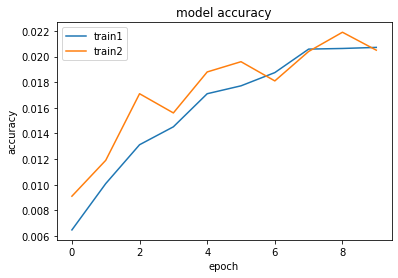

In [19]:
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train1','train2'],loc='upper left')
plt.show()

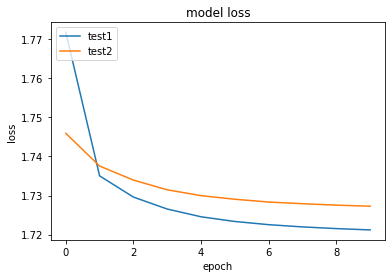

In [20]:
plt.plot(trained_model1.history['loss'])
plt.plot(trained_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test1','test2'],loc='upper left')
plt.show()

In [21]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

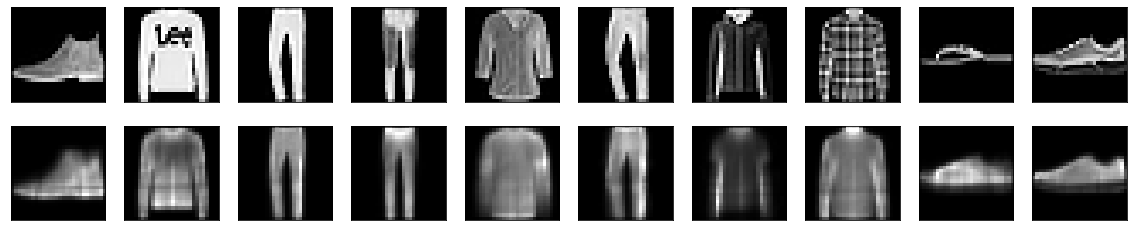

In [22]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()